<a href="https://colab.research.google.com/github/Auvarmf/Riset-MBKM-CNN2023/blob/main/Model_Selection_Neural_Network_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install --upgrade tensorflow

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import csv
import pandas as pd
from google.colab import drive

In [3]:
# Mount Google Drive untuk mengakses file dan folder
drive.mount('MBKMCNN')
dataset = '/content/MBKMCNN/MyDrive/MBKMCNN'
folder1 = '/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_neural_network/train/2017051002/face_2017051002_20221229_Pulang_26.png'
folder2 = '/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_neural_network/train/2017051057/face_2017051057_20221227_Masuk_25.png'

Mounted at MBKMCNN


In [4]:
img1 = image.load_img(folder1)
img2 = image.load_img(folder2)

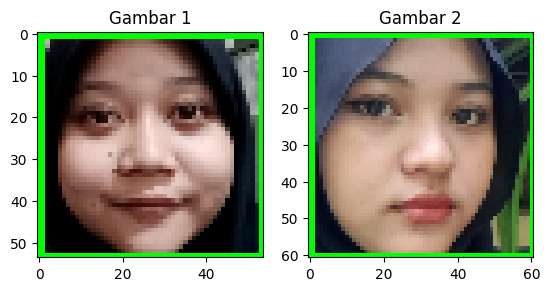

In [5]:
# Membuat subplot dengan 1 baris dan 2 kolom
plt.subplot(1, 2, 1)  # Subplot pertama (1 baris, 2 kolom, indeks 1)
plt.imshow(img1)
plt.title('Gambar 1')

plt.subplot(1, 2, 2)  # Subplot kedua (1 baris, 2 kolom, indeks 2)
plt.imshow(img2)
plt.title('Gambar 2')

plt.show()

In [6]:
cv2.imread(folder2).shape

(61, 61, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory('/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_neural_network/train',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = validation.flow_from_directory('/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_neural_network/validation',
                                                    target_size = (200,200),
                                                    batch_size = 3,
                                                    class_mode = 'binary')

Found 19 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),

                                    # Lapisan Dense pertama dengan aktivasi ReLU
                                    tf.keras.layers.Dense(512, activation='relu'),

                                    # Dropout Layer
                                    tf.keras.layers.Dropout(0.5),

                                    # Lapisan Dense terakhir dengan aktivasi sigmoid
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
output_dir = '/content/MBKMCNN/MyDrive/MBKMCNN/model_selection_neural_network'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

results = []

In [14]:
# Loop untuk 10, 20, dan 50 epoch
for num_epochs in [10, 20, 50]:
    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
                                        tf.keras.layers.MaxPool2D(2, 2),
                                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                        tf.keras.layers.MaxPool2D(2, 2),
                                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.MaxPool2D(2, 2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        tf.keras.layers.Dense(1, activation='sigmoid')
                                        ])

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.001),
                  metrics=['accuracy'])

    # Melatih model
    model_fit = model.fit(train_dataset,
                          steps_per_epoch=len(train_dataset),
                          epochs=num_epochs,
                          validation_data=validation_dataset,
                          validation_steps=len(validation_dataset))

    # Mengambil akurasi dan loss terbaik
    best_accuracy = max(model_fit.history['val_accuracy'])
    best_loss = min(model_fit.history['val_loss'])

    # Menyimpan hasil akurasi dan loss terbaik dalam list
    results.append([num_epochs, best_accuracy, best_loss])

Epoch 1/10
7/7 [==============================] - 5s 490ms/step - loss: 24.7278 - accuracy: 0.6316 - val_loss: 0.8034 - val_accuracy: 0.4737
Epoch 2/10
7/7 [==============================] - 4s 651ms/step - loss: 0.8772 - accuracy: 0.8947 - val_loss: 0.2283 - val_accuracy: 0.8947
Epoch 3/10
7/7 [==============================] - 5s 697ms/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.1222 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 4s 517ms/step - loss: 1.0674e-09 - accuracy: 1.0000 - val_loss: 0.1159 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 4s 554ms/step - loss: 8.6434e-10 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 4s 512ms/step - loss: 1.3016e-09 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 6s 858ms/step - loss: 2.0169e-09 - accuracy: 1.0000 - val_loss: 0.0993 - val_accuracy: 1.0000
Epo

Epoch 1/20
7/7 [==============================] - 7s 785ms/step - loss: 19.8983 - accuracy: 0.6316 - val_loss: 0.4813 - val_accuracy: 0.5789
Epoch 2/20
7/7 [==============================] - 4s 511ms/step - loss: 1.6838 - accuracy: 0.8421 - val_loss: 0.8499 - val_accuracy: 0.5263
Epoch 3/20
7/7 [==============================] - 3s 470ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9474
Epoch 4/20
7/7 [==============================] - 3s 470ms/step - loss: 2.9208e-05 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9474
Epoch 5/20
7/7 [==============================] - 5s 702ms/step - loss: 1.5103e-08 - accuracy: 1.0000 - val_loss: 0.1167 - val_accuracy: 0.9474
Epoch 6/20
7/7 [==============================] - 6s 876ms/step - loss: 1.3477 - accuracy: 0.8947 - val_loss: 0.9888 - val_accuracy: 0.6842
Epoch 7/20
7/7 [==============================] - 4s 582ms/step - loss: 1.6392 - accuracy: 0.8947 - val_loss: 2.3696 - val_accuracy: 0.5789
Epoch 8/20


Epoch 1/50
7/7 [==============================] - 5s 626ms/step - loss: 15.1419 - accuracy: 0.3684 - val_loss: 1.7089 - val_accuracy: 0.4737
Epoch 2/50
7/7 [==============================] - 4s 626ms/step - loss: 1.7856 - accuracy: 0.9474 - val_loss: 0.2249 - val_accuracy: 0.9474
Epoch 3/50
7/7 [==============================] - 6s 898ms/step - loss: 3.5944e-04 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9474
Epoch 4/50
7/7 [==============================] - 4s 648ms/step - loss: 2.8649e-05 - accuracy: 1.0000 - val_loss: 0.1988 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 4s 533ms/step - loss: 1.7919e-05 - accuracy: 1.0000 - val_loss: 0.1890 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 5s 800ms/step - loss: 2.1570e-05 - accuracy: 1.0000 - val_loss: 0.1793 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 4s 557ms/step - loss: 2.0759e-06 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 1.0000

In [15]:
# Menyimpan hasil dalam file CSV
output_file = os.path.join(output_dir, 'training_results_manipulation.csv')
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Epochs', 'Best Accuracy', 'Best Loss'])
    writer.writerows(results)

# Menyimpan hasil dalam DataFrame
results_df = pd.DataFrame(results, columns=['Epochs', 'Best Accuracy', 'Best Loss'])

# Menampilkan DataFrame
results_df

,Epochs,Best Accuracy,Best Loss
0,10,1.000000,0.084825
1,20,0.947368,0.055327
2,50,1.000000,0.000005
